In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

In [2]:
import numpy as np

In [3]:
import lal
import lalsimulation as lalsim

In [4]:
from scrinet.interfaces import lalutils, rotations

In [248]:
# params = lalutils.gen_td_modes_wf_params(m2=5, approximant=lalsim.SEOBNRv4PHM)
params = lalutils.gen_td_modes_wf_params(m1=60, m2=30, approximant=lalsim.SEOBNRv4PHM, S1x=0.5, S1y=0.2, S2x=0.5, S2y=0.3, f_min=14, f_ref=14, phiRef=2.6)
# params = lalutils.gen_td_modes_wf_params(m2=30, approximant=lalsim.NRSur7dq4, S1x=0.5, S1y=0., f_min=14, f_ref=14)

In [249]:
params

{'m1': 60,
 'm2': 30,
 'S1x': 0.5,
 'S1y': 0.2,
 'S1z': 0,
 'S2x': 0.5,
 'S2y': 0.3,
 'S2z': 0,
 'phiRef': 2.6,
 'r': 1,
 'deltaT': 0.000244140625,
 'f_min': 14,
 'f_ref': 14,
 'LALpars': None,
 'lmax': 2,
 'approximant': 52}

In [250]:
times, hlms = lalutils.gen_td_modes_wf(params, eob_all_ell_2_modes=True, modes=[[2,2],[2,1]])
# times, hlms = lalutils.gen_td_modes_wf(params, eob_all_ell_2_modes=False, modes=[[2,2],[2,1],[2,0],[2,-1],[2,-2]])

In [251]:
hlms

{(2,
  2): array([12361.64278845-3087.32377516j, 12293.05044295-3352.32527862j,
        12218.77872277-3615.80706951j, ...,     0.           -0.j        ,
            0.           -0.j        ,     0.           -0.j        ]),
 (2,
  1): array([47.50997326+313.31791091j, 50.2723309 +310.59074103j,
        52.9326303 +307.84338724j, ...,  0.          -0.j        ,
         0.          -0.j        ,  0.          -0.j        ]),
 (2,
  0): array([-0.9040109 -1.35107345j, -0.94661078-1.38458862j,
        -0.99015935-1.4220067j , ...,  0.        -0.j        ,
         0.        -0.j        ,  0.        -0.j        ]),
 (2,
  -1): array([ 95.22140982-504.33407329j, 101.24292871-505.52339451j,
        107.34973209-506.63892146j, ...,   0.          -0.j        ,
          0.          -0.j        ,   0.          -0.j        ]),
 (2,
  -2): array([12355.32367123+3086.22062831j, 12286.60899494+3351.05920858j,
        12212.21775994+3614.37522351j, ...,     0.           -0.j        ,
            0

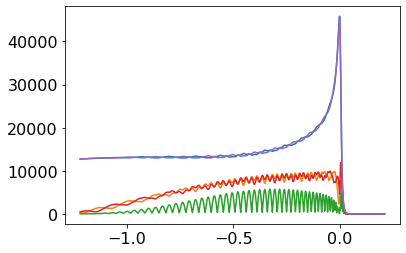

In [252]:
plt.figure()
plt.plot(times, np.abs(hlms[(2,2)]))
plt.plot(times, np.abs(hlms[(2,1)]))
plt.plot(times, np.abs(hlms[(2,0)]))
plt.plot(times, np.abs(hlms[(2,-1)]))
plt.plot(times, np.abs(hlms[(2,-2)]))

In [253]:
thetaJN, alpha0, phi_aligned = rotations.compute_L_to_J_angles(
    mass1=params['m1'], mass2=params['m2'], f_ref=params['f_min'], inc=0, phiref=params['phiRef'],
    spin1x=params['S1x'], spin1y=params['S1y'], spin1z=params['S1z'],
    spin2x=params['S2x'], spin2y=params['S2y'], spin2z=params['S2z'])
print(thetaJN, alpha0, phi_aligned)

2.419153146058297 2.346964934212575 -0.4145068745847859


In [254]:
hlms_3col = rotations.convert_to_nrutils_dict(times, hlms)

In [255]:
hlms_3col_j = {}
hlms_j = {}
for k in hlms_3col.keys():
    l,m=k
    hlms_3col_j[k] = rotations.rotate_wfarrs_at_all_times(l,m,hlms_3col,[-alpha0 , -thetaJN, -phi_aligned])
    hlms_j[k] = hlms_3col_j[k][:,1] + 1.j * hlms_3col_j[k][:,2]

In [256]:
alpha, beta, gamma, X, Y, Z = rotations.calc_coprecessing_angles(hlms_j, domain_vals=times, return_xyz='all')

/Users/spx8sk/work/git/stk/scrinet/scrinet/interfaces/rotations.py:598: UserWarning: flipping manually for negative domain
  warnings.warn('flipping manually for negative domain')


(-1, 0.3)

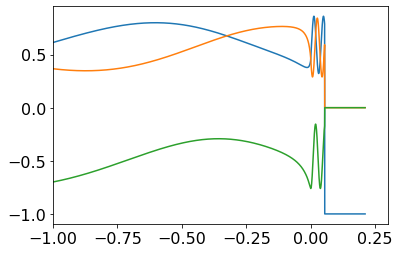

In [257]:
plt.figure()
plt.plot(times, X)
plt.plot(times, Y)
plt.plot(times, Z)
plt.xlim(-1,0.3)

(-1, 0.3)

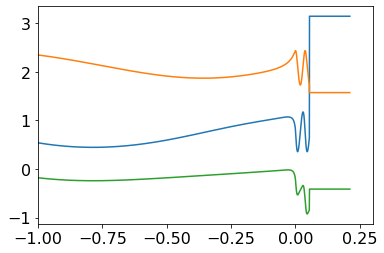

In [258]:
plt.figure()
plt.plot(times, alpha)
plt.plot(times, beta)
plt.plot(times, gamma)
plt.xlim(-1,0.3)

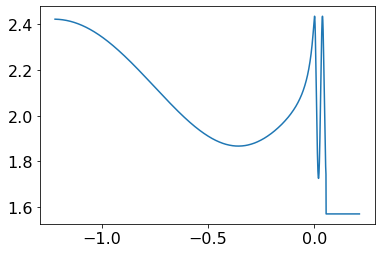

In [259]:
plt.figure()
plt.plot(times, beta)
# plt.xlim(-1,0.3)

(-0.1, 0.1)

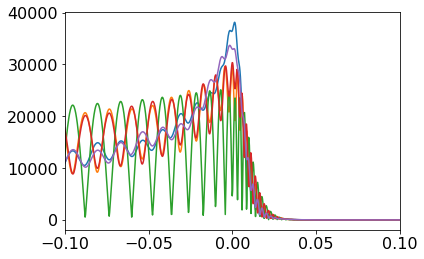

In [260]:
plt.figure()
plt.plot(times, np.abs(hlms_j[(2,2)]))
plt.plot(times, np.abs(hlms_j[(2,1)]))
plt.plot(times, np.abs(hlms_j[(2,0)]))
plt.plot(times, np.abs(hlms_j[(2,-1)]))
plt.plot(times, np.abs(hlms_j[(2,-2)]))
plt.xlim(-0.1,0.1)

In [261]:
hlms_3col_coprec = {}
hlms_coprec = {}
for k in hlms_3col.keys():
    l,m=k
    hlms_3col_coprec[k] = rotations.rotate_wfarrs_at_all_times(l,m,hlms_3col_j,[-gamma,-beta,-alpha])
    hlms_coprec[k] = hlms_3col_coprec[k][:,1] + 1.j * hlms_3col_coprec[k][:,2]

In [262]:
plt.figure()
plt.plot(times, np.abs(hlms_coprec[(2,2)]))
plt.plot(times, np.abs(hlms_coprec[(2,1)]))
plt.plot(times, np.abs(hlms_coprec[(2,0)]))
plt.plot(times, np.abs(hlms_coprec[(2,-1)]), ls='--')
plt.plot(times, np.abs(hlms_coprec[(2,-2)]), ls='--')
plt.xlim(-0.1,0.1)

(-0.1, 0.1)

In [263]:
# go from co-prec to J-aligned

In [264]:
hlms_3col_coprec_to_j = {}
hlms_coprec_to_j = {}
for k in hlms_3col.keys():
    l,m=k
    hlms_3col_coprec_to_j[k] = rotations.rotate_wfarrs_at_all_times(l,m,hlms_3col_coprec,[alpha,beta,gamma])
    hlms_coprec_to_j[k] = hlms_3col_coprec_to_j[k][:,1] + 1.j * hlms_3col_coprec_to_j[k][:,2]

(-0.1, 0.1)

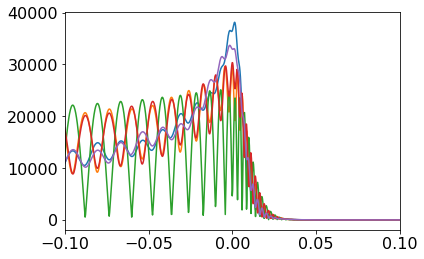

In [265]:
plt.figure()
plt.plot(times, np.abs(hlms_coprec_to_j[(2,2)]))
plt.plot(times, np.abs(hlms_coprec_to_j[(2,1)]))
plt.plot(times, np.abs(hlms_coprec_to_j[(2,0)]))
plt.plot(times, np.abs(hlms_coprec_to_j[(2,-1)]))
plt.plot(times, np.abs(hlms_coprec_to_j[(2,-2)]))
plt.xlim(-0.1,0.1)

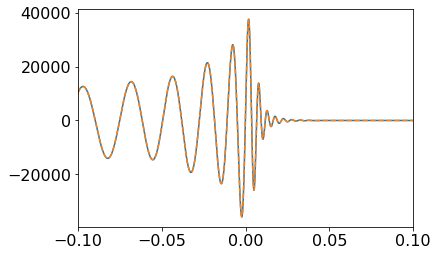

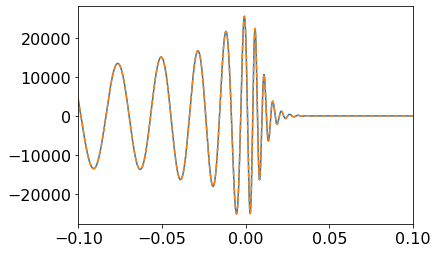

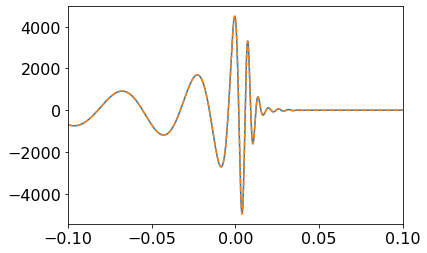

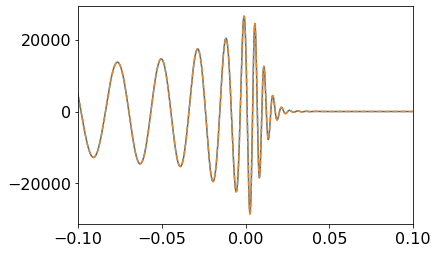

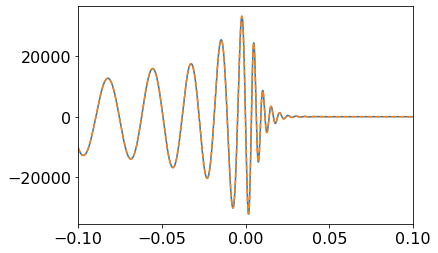

In [266]:
for k in hlms_coprec_to_j.keys():
    plt.figure()
    plt.plot(times, np.imag(hlms_coprec_to_j[k]))
    plt.plot(times, np.imag(hlms_j[k]), ls='--')
    plt.xlim(-0.1,0.1)
    plt.show()
    plt.close()

In [267]:
# go from J-aligned to L along z inertial

In [268]:
hlms_3col_L = {}
hlms_L = {}
for k in hlms_3col_coprec_to_j.keys():
    l,m=k
    hlms_3col_L[k] = rotations.rotate_wfarrs_at_all_times(l,m,hlms_3col_coprec_to_j,[phi_aligned, thetaJN, alpha0])
    hlms_L[k] = hlms_3col_L[k][:,1] + 1.j * hlms_3col_L[k][:,2]

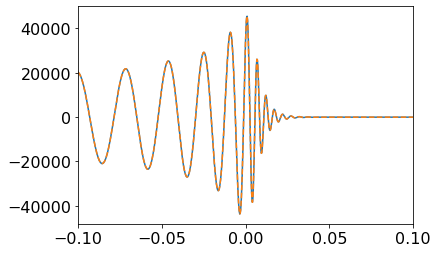

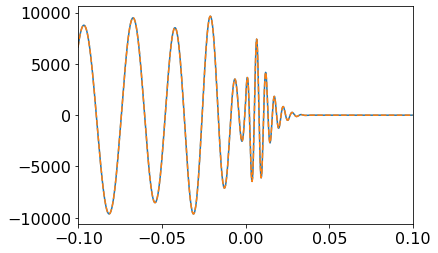

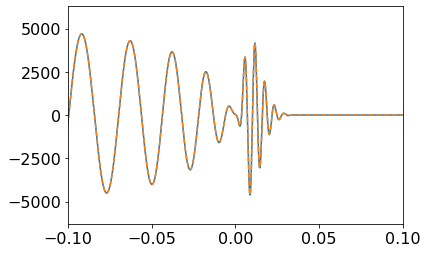

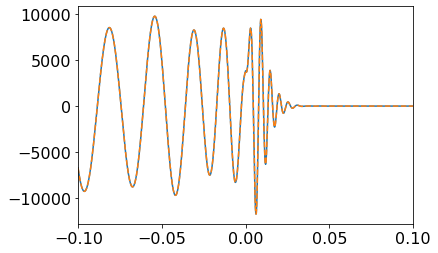

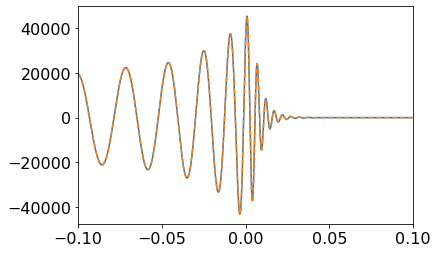

In [269]:
for k in hlms_coprec_to_j.keys():
    plt.figure()
    plt.plot(times, np.real(hlms_L[k]))
    plt.plot(times, np.real(hlms[k]), ls='--')
    plt.xlim(-0.1,0.1)
    plt.show()
    plt.close()